## Seasonal analysis and genre exploration 

This work is conducted in a seperate notebook because it is easier to keep track of the workflow from start to finish. 

In [76]:
import get_unique
import pandas as pd
import data_sanitizer
import main
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [13]:
netflix_titles_filepath = 'netflix_titles.csv'
df = main.get_netflix_catalogue_dataframe()
data_sanitizer.handle_null_values(df) 
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [16]:
unique_genres = get_unique.genres(df)
len(unique_genres)

42

In [19]:
unique_countries = get_unique.countires(df)
len(unique_countries)

114

#### Lets start by getting av overview of the dataset
This will be done by EDA (exploratory data analysis)

First studying the relation between TV Shows and Movies

Text(0.5, 1.0, 'Content overview')

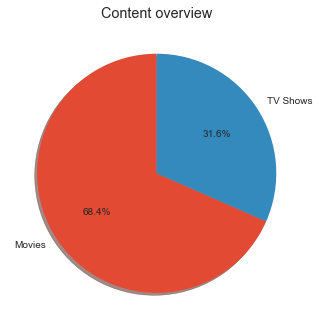

In [43]:
grouped_by_type = df["type"].value_counts()
labels = "Movies","TV Shows"
sizes = grouped_by_type[0], grouped_by_type[1]

plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Content overview")

We see that about 2/3rds of the content on Netflix is movies, while the remaining part are TV Shows.

Now lets get an overview of the historical rise in content over the years:

In [53]:
movie_df = df[df["type"] == "Movie"]
show_df = df[df["type"] == "TV Show"]

movie_df["date_added"]

0        September 9, 2019
1        September 9, 2016
4        September 8, 2017
6        September 8, 2017
7        September 8, 2017
               ...        
5577         April 1, 2016
5578         April 1, 2016
5579         April 1, 2016
5580         April 1, 2016
6231    Unknown date_added
Name: date_added, Length: 4265, dtype: object

The date format is "Month dd, Year". We want to extract only the year. This can be done as such:

In [74]:
def get_years(df):
    valid_years = []
    for row in df:
        year = row[-4:] #Year is the last 4 chars in the date_added string
        if year != "dded": #In the case where the year is "Unknow date added"
            valid_years.append(int(year))
    return valid_years
        
movie_years = get_years(movie_df["date_added"])
show_years = get_years(show_df["date_added"])

In [141]:
y_mov

(1, 2, 1, 13, 4, 6, 19, 58, 264, 913, 1290, 1546, 147)

In [95]:
#movie_yrs_count = pd.Series(movie_years).value_counts()
#show_yrs_count = pd.Series(show_years).value_counts()

2019    1546
2018    1290
2017     913
2016     264
2020     147
2015      58
2014      19
2011      13
2013       6
2012       4
2009       2
2010       1
2008       1
dtype: int64

In [112]:
movie_yrs_dict = dict((x,movie_years.count(x)) for x in set(movie_years)) 
show_yrs_dict = dict((x,show_years.count(x)) for x in set(show_years))
movie_yrs_dict

{2016: 264,
 2017: 913,
 2018: 1290,
 2019: 1546,
 2020: 147,
 2008: 1,
 2009: 2,
 2010: 1,
 2011: 13,
 2012: 4,
 2013: 6,
 2014: 19,
 2015: 58}

Text(0.5, 1.0, 'Amount of content added to Netflix over the years')

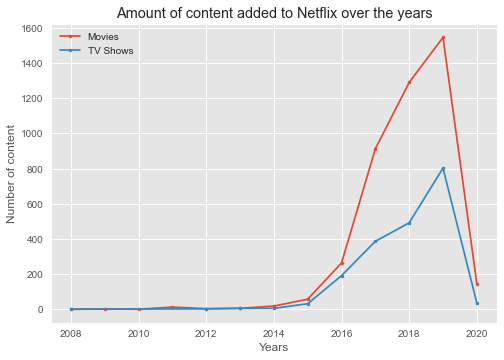

In [128]:
lists_mov = sorted(movie_yrs_dict.items())
x_mov,y_mov = zip(*lists_mov)

lists_shw = sorted(show_yrs_dict.items())
x_shw, y_shw = zip(*lists_shw)


plt.plot(x_mov,y_mov,marker=".",label="Movies")
plt.plot(x_shw,y_shw,marker=".",label="TV Shows")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Number of content")
plt.title("Amount of content added to Netflix over the years")



We see that there are have been a major incerease in the amount of added content to Netflix. This is especially true for the Movies category. A reason for this might be that it is easier to produce a movie compared to creating an entire TV Show. Furhter, encapsulated in a single TV Show there might be several seasons. 

Notice that there is a strong decline in the amount of content added to Netflix in 2020. Two obvious reasons emerge. Firstly, we do not know which date the dataset was created (was it early in 2020?). Secondly, the amount of produced content may have been effected by the covid-19 pandemic, creating a delay and thus a significantly reduced amount of added content to Netflix. 

To study the dataset more detailed, we know study each month and year for when a content was added:

In [139]:
movie_df["date_added"].reset_index()


,index,date_added
0,0,"September 9, 2019"
1,1,"September 9, 2016"
2,4,"September 8, 2017"
3,6,"September 8, 2017"
4,7,"September 8, 2017"
...,...,...
4260,5577,"April 1, 2016"
4261,5578,"April 1, 2016"
4262,5579,"April 1, 2016"
4263,5580,"April 1, 2016"
